<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Libraries</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Plan of the project</div>

The data set contains a wide range of information about the flight behavior of an airline's customers. The aim is to perform a cluster analysis to identify homogeneous customer segments and develop a better understanding of the needs and behaviors of the different customer profiles.

**Project process:** 
1) Data exploration and preparation  
2) Feature engineering  
3) Cluster analysis with K-Means and DBSCAN  
4) Interpretation of the clusters


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">The Data</div>

**Source:** https://www.kaggle.com/datasets/singhnproud77/eastwestairlines-heirarchical-clustering/data


**Balance:** The total number of miles that were eligible for free air travel.  
**Qual_miles:** The number of miles that qualify for Topflight status.  
**cc1_miles:** Number of miles earned with the frequent flyer credit card in the last 12 months.  
Where 1= under 5000 miles, 2= 5000 - 10000 miles, 3= 10001 - 25000 miles, 4= 25001 - 50000 miles and 5= over 50000 miles.    
**cc2_miles:** Number of miles earned with the Rewards credit card in the last 12 months.  
Where 1= under 5000 miles, 2= 5000 - 10000 miles, 3= 10001 - 25000 miles, 4= 25001 - 50000 miles and 5= over 50000 miles.  
**cc3_miles:** Number of miles earned with the Small Business credit card in the last 12 months.  
Where 1= under 5000 miles, 2= 5000 - 10000 miles, 3= 10001 - 25000 miles, 4= 25001 - 50000 miles and 5= over 50000 miles.  
**Bonus_miles:** Number of miles earned in the last 12 months through non-flight bonus transactions.  
**Bonus_trans:** Number of non-flight bonus transactions in the last 12 months.    
**Flight_miles_12mo:** The number of flight miles in the last 12 months.  
**Flight_trans_12:** The number of flight transactions in the last 12 months.   
**Days_since_enroll:** The number of days since enrolling in the frequent flyer program.  
**Award:** Indicates whether the person has received a free flight or not.  

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">IDA</div>

In [3]:
airline = pd.read_csv('EastWestAirlines.csv')
display(airline.head())
display(airline.shape)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


(3999, 12)

In [4]:
display(airline.describe())

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
display(airline.isna().sum())

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [6]:
display(airline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


None

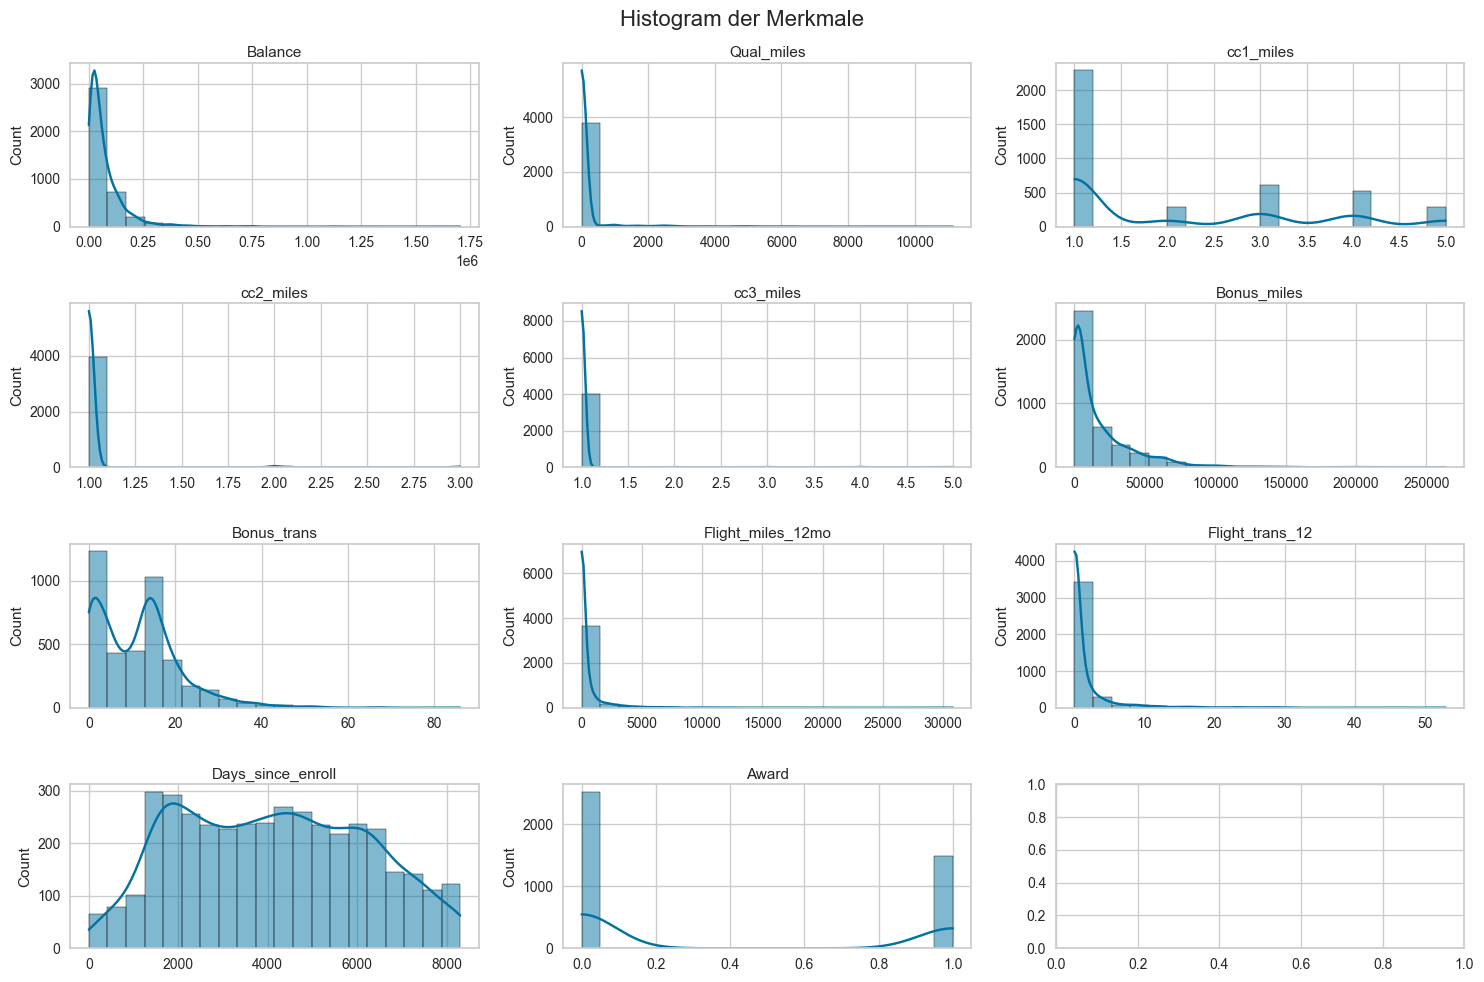

In [7]:
# Features to plot
features = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',	'Bonus_miles',	'Bonus_trans',	
            'Flight_miles_12mo', 'Flight_trans_12',	'Days_since_enroll', 'Award']

# Creates a grid plot with 5 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

# Iterates over the features and creates histograms in subplots
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(data=airline, x=feature, ax=axes[row, col], bins=20, kde=True)
    axes[row, col].xaxis.set_label_position('top')# Titel über den plots


# makes sure that the diagrams do not overlap
plt.suptitle('Histogram of features', fontsize=16)
plt.tight_layout()
plt.show()


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">EDA</div>

The histogram indicates that features such as cc2_miles and cc3 miles have an unbalanced distribution. The number of 1 (under 5000 miles) accounts for 99% of the data in both features. Due to the low variance, these features are irrelevant for the cluster analysis and therefore will be dismissed.  

In addition there are possible outliers in other features that could lead to inexact or biased clusters. Therefore, we identify these with the help of Z-scores and then remove them from the data set. 

In [8]:
display(airline['cc2_miles'].value_counts())

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

In [9]:
display(airline['cc3_miles'].value_counts())

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

In [10]:
# drops the columns 'ID', 'cc2_miles' and 'cc3_miles'
airline = airline.drop(['ID', 'cc2_miles', 'cc3_miles'], axis=1)

In [11]:
# checks with z-score if there are outliers in the data

all_outliers = pd.DataFrame()

for column in airline.columns:
    z_scores = (airline[column] - airline[column].mean()) / airline[column].std()                 # calculate z-scores
    outliers = airline[np.abs(z_scores) > 3] 
    print(column, outliers.shape[0])                                                              # print outliers
    airline = airline[np.abs(z_scores) < 3]                                                       # remove outliers


display(f"The Dataset now contains {airline.shape[0]} rows")

Balance 74
Qual_miles 79
cc1_miles 0
Bonus_miles 63
Bonus_trans 48
Flight_miles_12mo 83
Flight_trans_12 80
Days_since_enroll 0
Award 0


'Der Datensatz enthält nun 3572 Zeilen'

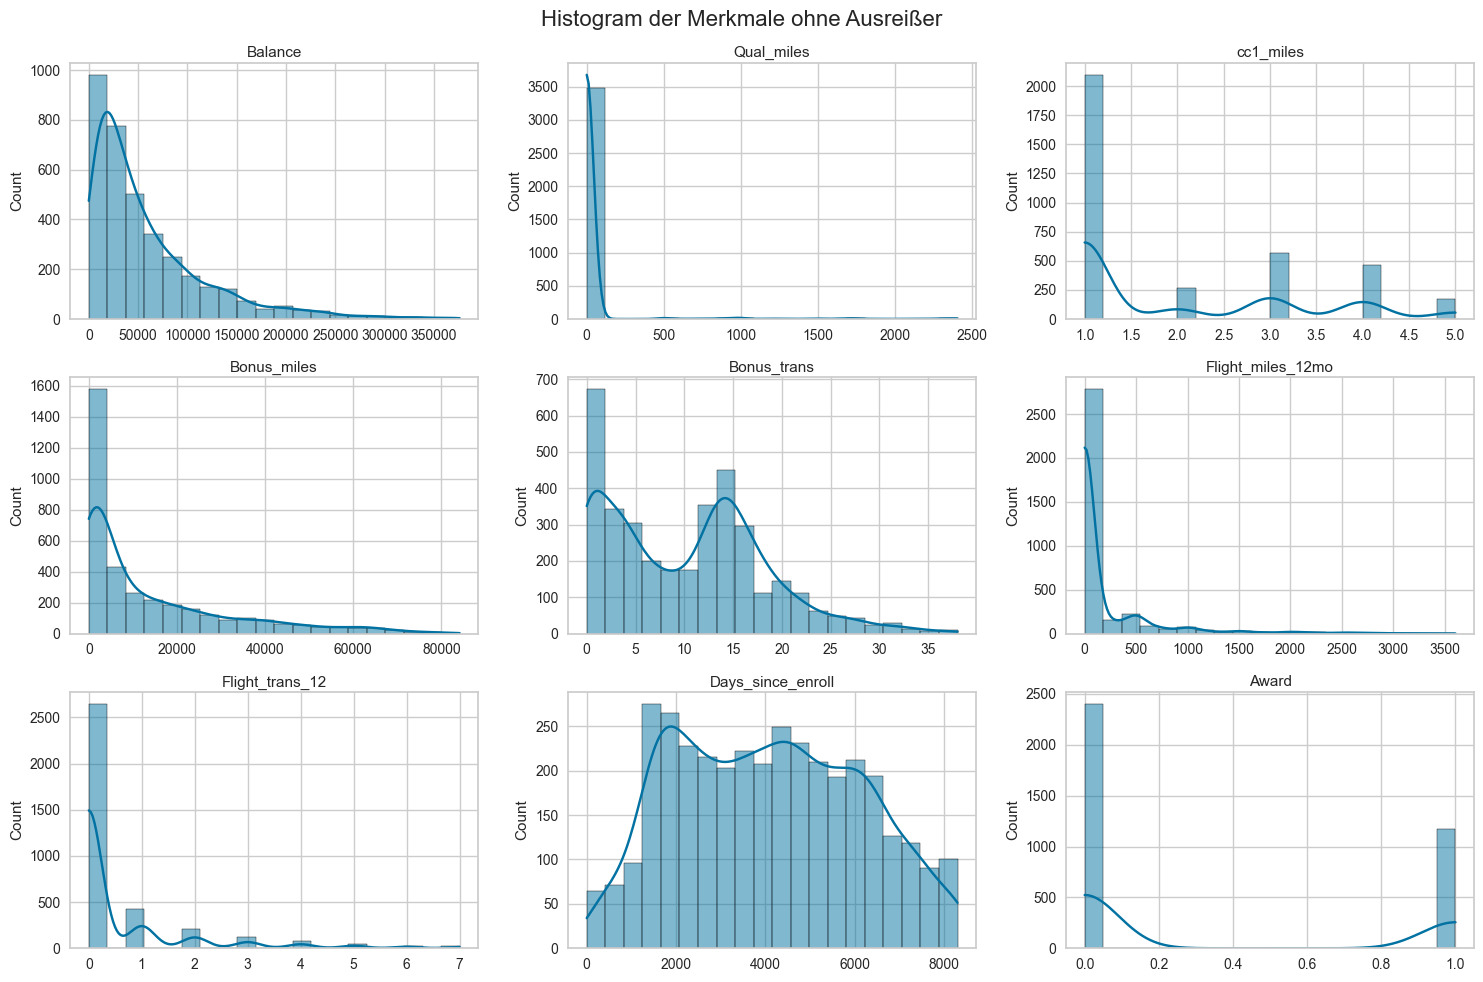

In [12]:

features = ['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans',	
            'Flight_miles_12mo', 'Flight_trans_12',	'Days_since_enroll', 'Award']


# creates a grid plot with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Iterates over the features and creates histograms in subplots
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(data=airline, x=feature, ax=axes[row, col], bins=20, kde=True)
    axes[row, col].xaxis.set_label_position('top')# Titel über den plots


plt.suptitle('Histogram of features without outliers', fontsize=16)
plt.tight_layout()
plt.show()


In [13]:
# scales the data with the StandardScaler
standard_scaler = StandardScaler()
scale =  standard_scaler.fit_transform(airline)
df_sc = pd.DataFrame(scale, columns= airline.columns)

display(df_sc.head())

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.514489,-0.149411,-0.749702,-0.782255,-1.153817,-0.408641,-0.459731,1.432472,-0.699252
1,-0.662100,-0.149411,-0.749702,-0.779936,-1.029272,-0.408641,-0.459731,1.416877,-0.699252
2,-0.295354,-0.149411,-0.749702,-0.558853,-0.780183,-0.408641,-0.459731,1.449043,-0.699252
3,-0.736212,-0.149411,-0.749702,-0.763813,-1.153817,-0.408641,-0.459731,1.409079,-0.699252
4,0.640137,-0.149411,1.544360,1.657460,1.959801,3.971043,2.689185,1.400794,1.430099


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Dimensionality Reduction</div>

A Principal Component Analysis (PCA) is applied to perform a dimensional reduction of the data set. The aim is to reduce the number of variables while retaining the important information to enable a more efficient analysis.

In [14]:
# Transformiert die Daten mit PCA
pca = PCA()
pca_transformed = pca.fit_transform(df_sc)
df_pca = pd.DataFrame(pca_transformed, index=df_sc.index)
df_pca.round(2)

,0,1,2,3,4,5,6,7,8
0,-1.53,-0.20,0.56,-1.51,-0.58,-0.44,-0.45,0.01,0.02
1,-1.53,-0.21,0.54,-1.42,-0.62,-0.59,-0.40,0.02,0.03
2,-1.17,-0.29,0.51,-1.53,-0.44,-0.47,-0.22,0.02,0.19
3,-1.60,-0.20,0.55,-1.40,-0.66,-0.58,-0.52,0.01,0.04
4,4.70,3.40,-0.57,-0.23,-0.79,-0.95,-0.17,0.90,-0.03
...,...,...,...,...,...,...,...,...,...
3567,-0.89,0.70,-0.14,1.46,-0.98,1.05,-0.02,-0.19,0.23
3568,-1.03,-0.03,0.04,1.11,-0.70,1.61,0.54,0.09,-0.06
3569,0.62,-0.76,-0.23,1.48,-0.41,1.33,-0.35,0.04,-0.16
3570,-1.53,1.11,-0.61,0.32,0.75,0.62,-0.40,0.20,-0.09


1 . Principal Component 0.346
2 . Principal Component 0.2004
3 . Principal Component 0.1122
4 . Principal Component 0.1067
5 . Principal Component 0.0989
6 . Principal Component 0.0635
7 . Principal Component 0.0466
8 . Principal Component 0.016
9 . Principal Component 0.0097


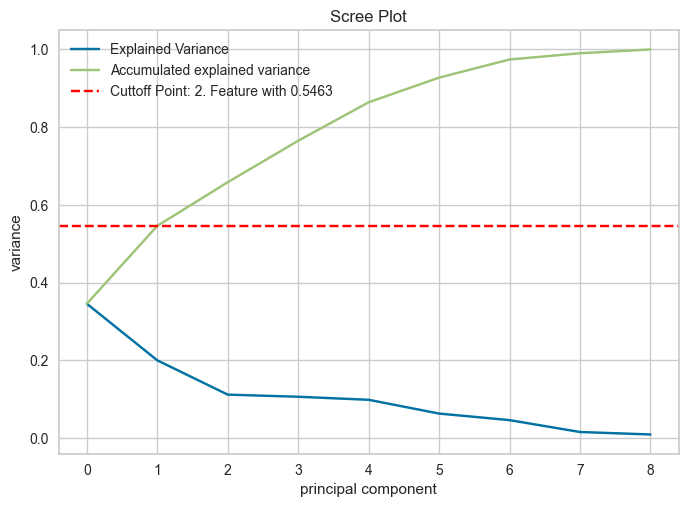

In [15]:
# Kalkuliert die kumulierte Varianz 
explained_variance = pca.explained_variance_ratio_ 
retain = np.sum(explained_variance[:2]) 

# Gibt die kumulierte Varianz für alle Principal Components aus
for i in range(0, len(explained_variance)):
        print(f"{i + 1:<2}. Principal Component {np.round(a = explained_variance[i], decimals = 4)}")

# Plottet die kumulierte Varianz
plt.title("Scree Plot")
plt.xlabel("principal component")
plt.ylabel("variance")
plt.plot(explained_variance,label='Explained Variance')
plt.plot(np.add.accumulate(explained_variance),label='Accumulated explained variance')
plt.axhline(y = retain,
                color = "#fe0101",
                linestyle = "--",
                label = f"Cuttoff Point: {2}. Feature with {np.round(a = retain, decimals = 4)}")
plt.legend();

The scree plot and the variance per principal component show that the first 5 principal components already account 86.78% of the total variance. The first principal component contributes the largest share with 34.6%, followed by the second principal component with 20.04%. 

In [16]:
def Kmean_silhouette_score_plot(df_pca, max_clusters = 11,color= None, legend_label=None): 
    """
    Funktion zur Berechnung des silhouette scores und zur Erstellung eines silhouette score plots
    """ 
    
    silhouette_scores = []                                                  # Liste für silhouette scores
    
    for n in range(2, max_clusters): 
        kmeans = KMeans(n_clusters=n,                                       # Anzahl der Cluster
                        random_state= 29,                                   # initialisiert den Zufallsgenerator
                        init='k-means++',                                   # initialisiert die Cluster zufällig    
                        n_init=20,
                        tol= 0.0001
                        )                                                   # initialisiert den KMeans Algorithmus
        cluster_labels = kmeans.fit_predict(df_pca)                          # Berechnung der Cluster Labels
        silhouette_scores.append(silhouette_score(df_pca, cluster_labels))   # Berechnung des silhouette scores


    plt.plot(range(2, max_clusters),                                        # plottet die silhouette scores
             silhouette_scores, color=color)
    plt.title('Silhouette Score Plot')
    plt.xlabel('Anzahl der Cluster')
    plt.ylabel('Silhouette Score')
    
    return

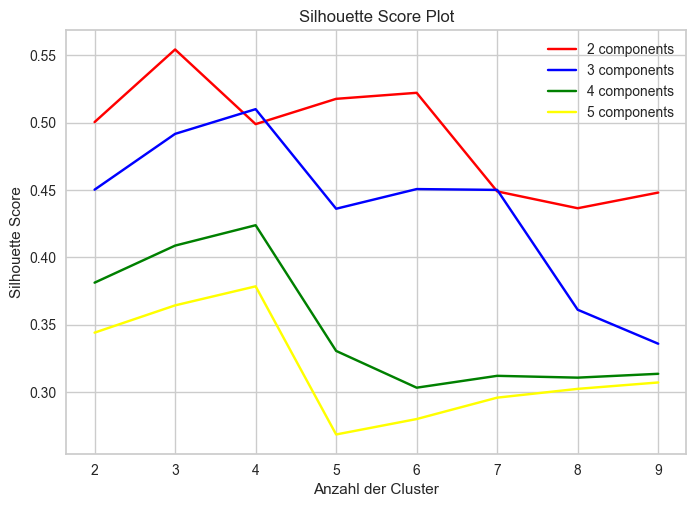

In [17]:
# zeigt den silhouette score plot für die ersten 5 principal components
colors = ['red','blue','green','yellow']
for n in range(2,6):
    X = df_pca.iloc[:,:n]
    Kmean_silhouette_score_plot(X, 10, color=colors[n-2])

plt.legend(['2 components','3 components','4 components','5 components']);

Given the previous results, a selection of 2, 3 or 4 principal components seems appropriate to cover the total variance. To determine the optimal number of components, the upper silhouette score plot is considered. This shows that the dimension reduction to 2 principal components (55%) has the best performance, even compared to the non-dimension-reduced dataset (plot below). 

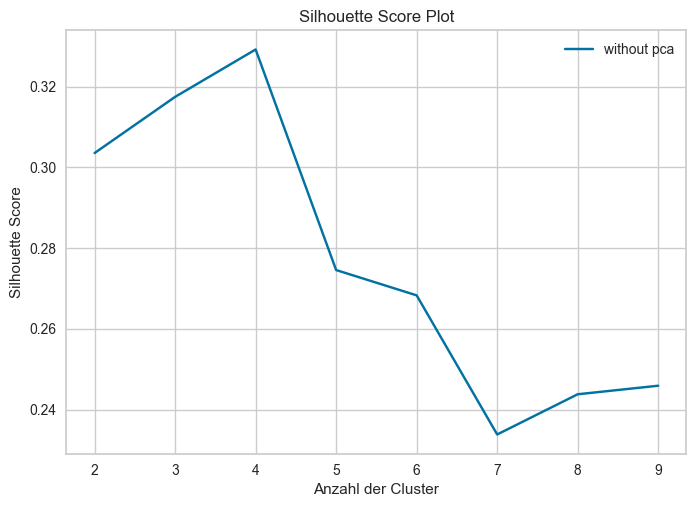

In [18]:
# Silhouette score plot ohne Dimensionsreduktion
Kmean_silhouette_score_plot(df_sc, 10)
plt.legend(['without pca']);

In [19]:
# Selektiert die ersten 2 Principal Components als Features
pca_data = df_pca.iloc[:,:2]

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Clustering</div>

### K-Means 

In [20]:
def silhouette_visualizer(pca_data, n_clusters):
    """
    Funktion zur Erstellung eines silhouette visualizers
    pca_data: Datensatz
    n_clusters: Anzahl der Cluster
    """

    kmeans = KMeans(n_clusters=n_clusters,
                    random_state= 29,
                    init='k-means++',
                    n_init=30)
    
    visualizer = SilhouetteVisualizer(kmeans, 
                                      colors='yellowbrick')
    
    visualizer.fit(pca_data)        # passt den Visualizer an die Daten an
    visualizer.finalize()       # finalisiert den Plot

    return

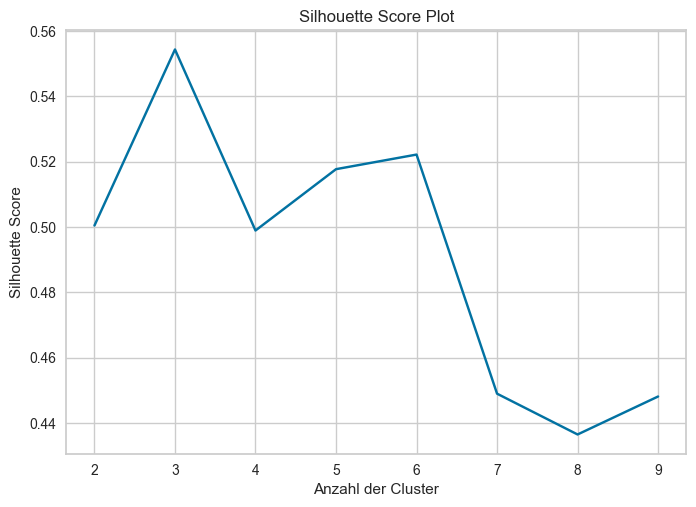

In [21]:
Kmean_silhouette_score_plot(pca_data, 10)

The silhouette score plot shows that the highest score of 0.56 is achieved with 3 clusters. This indicates that the data can be effectively divided into three well-differentiated groups. A silhouette score of 0.56 indicates an acceptable, if not outstanding, separation of the clusters.

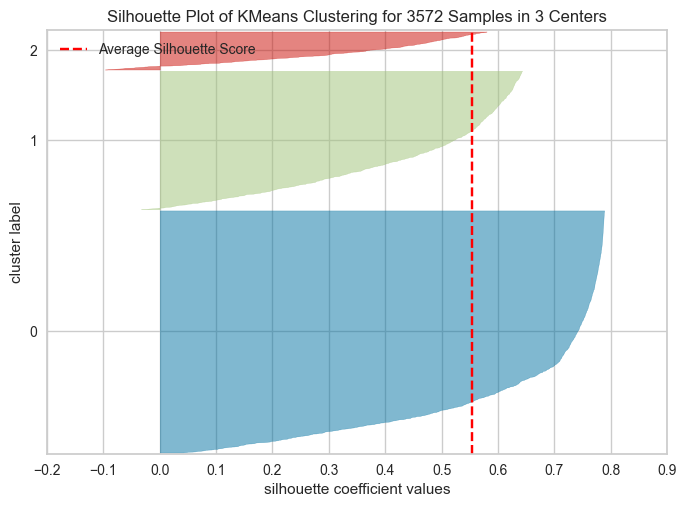

In [22]:
silhouette_visualizer(pca_data, n_clusters=3)

The **first cluster (0)** comprises 2066 instances, ~70% are above the average score and some even reach the maximum score of ~0.78. The clear silhouette indicates that the instances in the cluster are homogeneous and well separated from each other.  

In the **second cluster (1)** with 1181 instances, ~40% achieve the average score. A small proportion (~1%) is negative, which indicates an incorrect allocation. In addition, the somewhat faster rise indicates that there may be a certain heterogeneity within the cluster.  

The **third cluster (2)** comprises 325 instances and only a small proportion reaches the average score. The almost linear rise indicates that some instances in the cluster may not be coherent or have similarities to other clusters. The negative part in the cluster indicates an incorrect assignment.


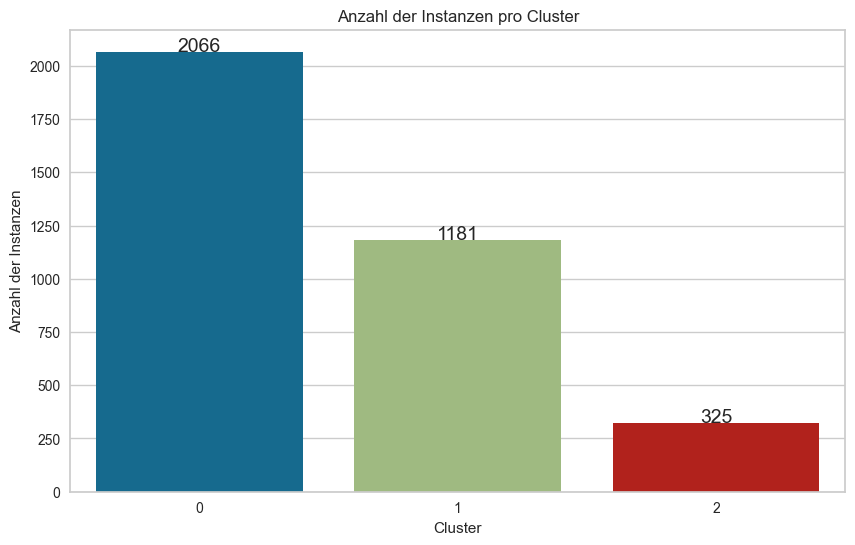

In [23]:
# Berechnet die Anzahl der Instanzen pro Cluster
X = pca_data.values
kmeans = KMeans(n_clusters=3, random_state= 29, init='k-means++', n_init=30)
cluster_labels = kmeans.fit_predict(X)
pd.Series(cluster_labels).value_counts()


plt.figure(figsize=(10, 6))
sns.countplot(x=cluster_labels)
plt.title('Anzahl der Instanzen pro Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anzahl der Instanzen')
for i in range(3): # 3 clusters
    plt.text(x=i, y=pd.Series(cluster_labels).value_counts()[i]+2, 
             s=pd.Series(cluster_labels).value_counts()[i],
             horizontalalignment='center', 
             fontdict={'size': 14})
plt.show()

## DBSCAN/OPTICS 

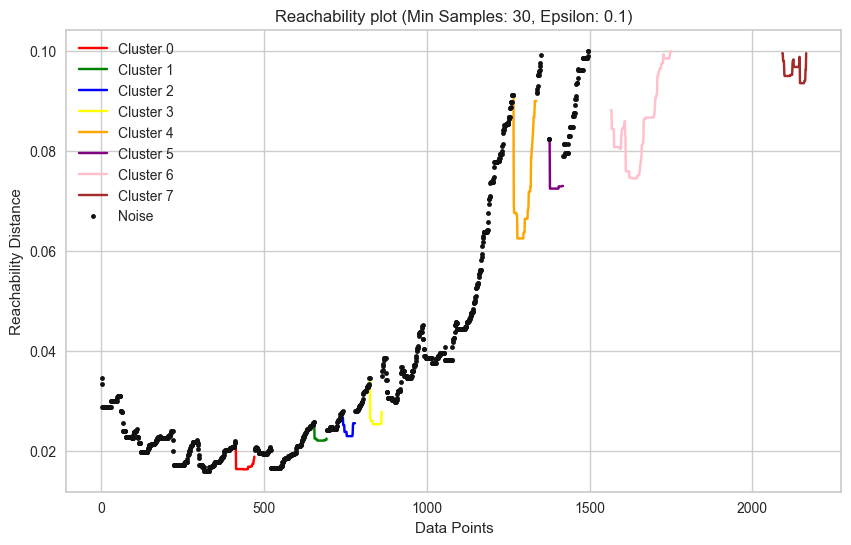

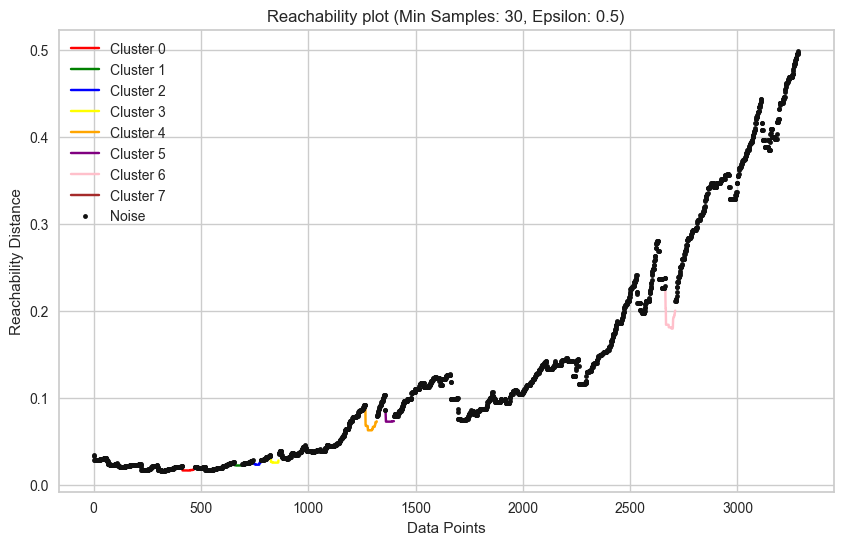

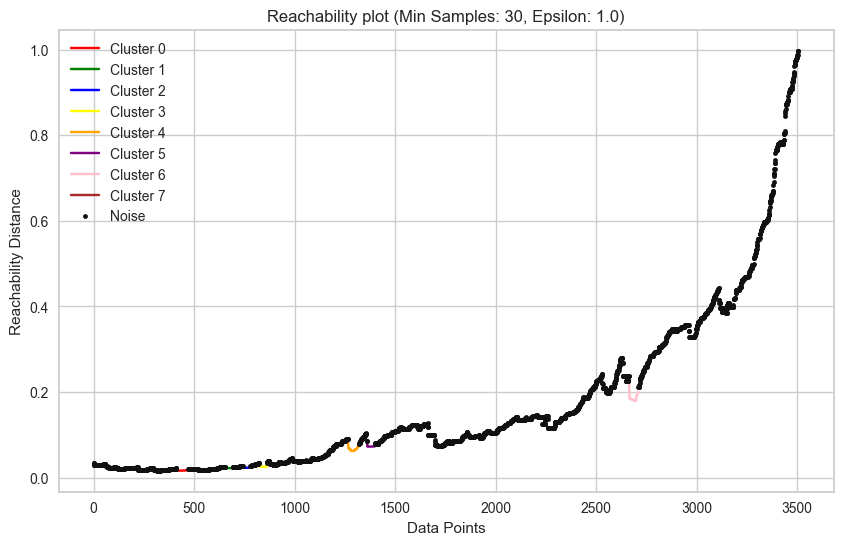

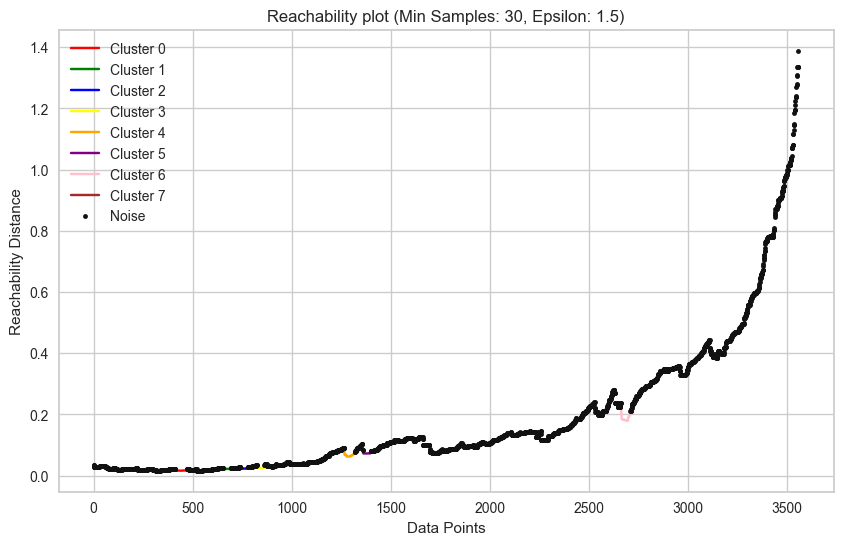

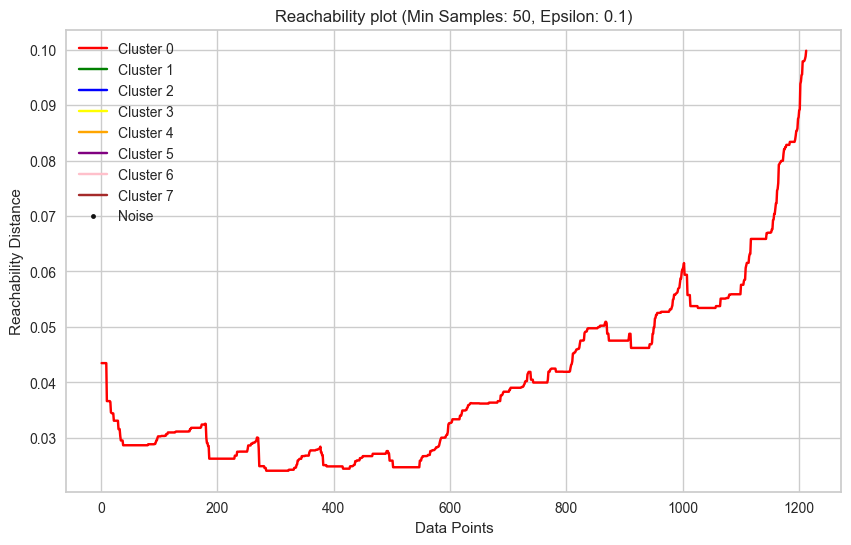

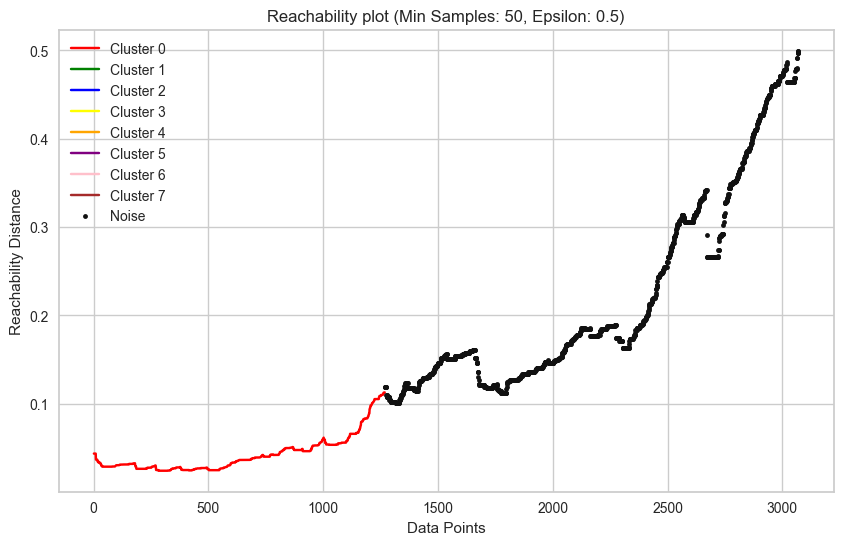

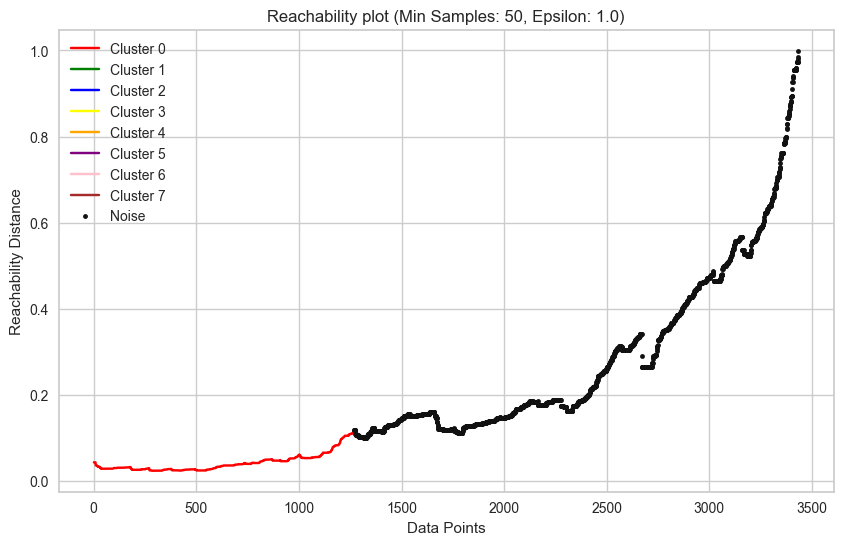

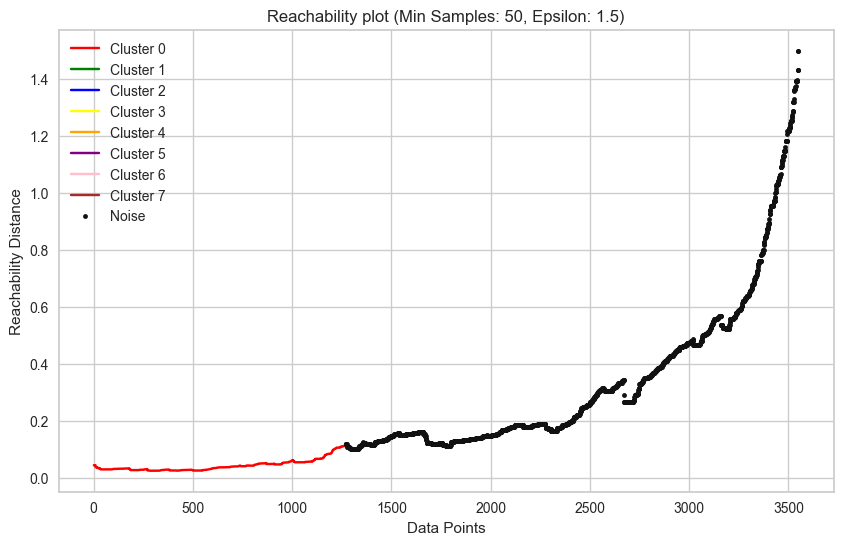

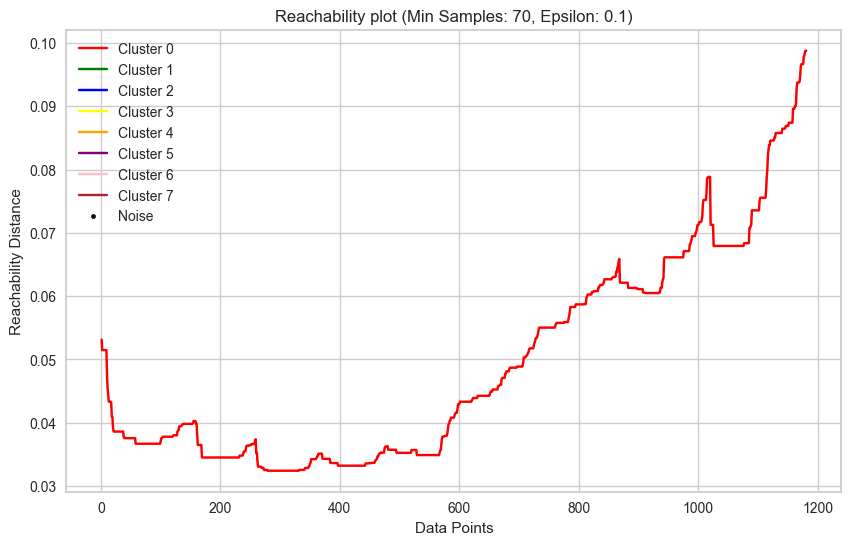

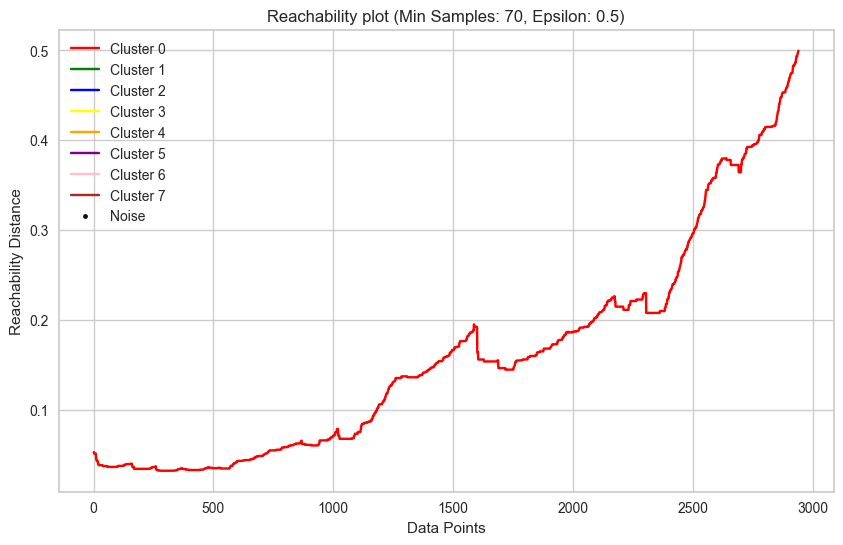

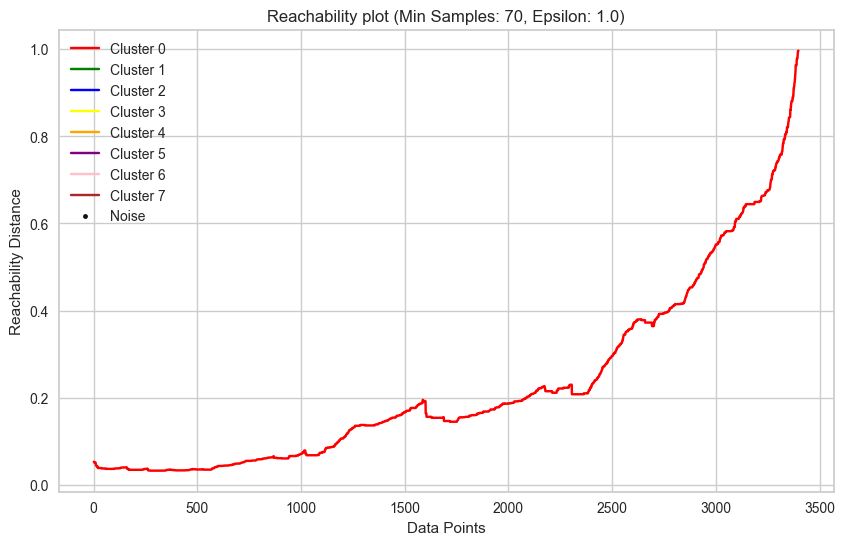

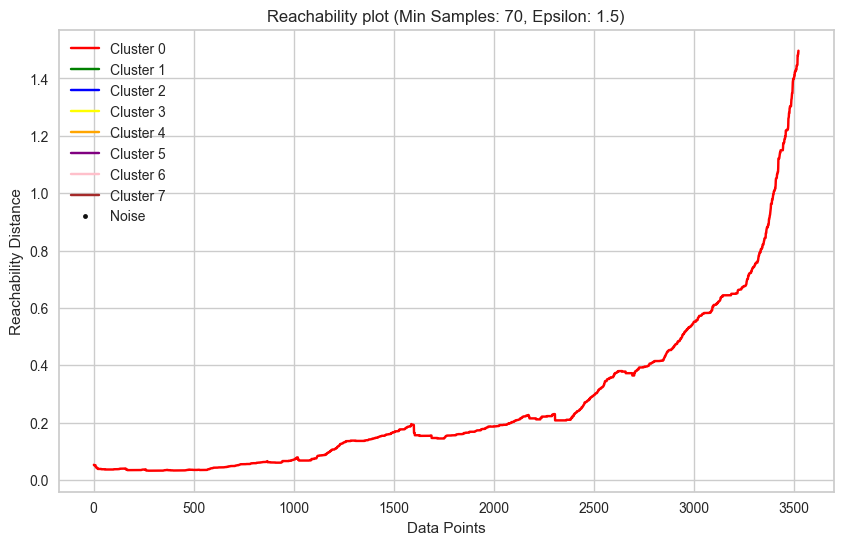

In [24]:
# Iteriert über verschiedene Werte von min_samples und epsilon
min_samples_values = [30, 50, 70]
epsilon_values = [0.1, 0.5, 1.0, 1.5]

for min_samples in min_samples_values:
    for epsilon in epsilon_values:
        optics = OPTICS(min_samples=min_samples, max_eps=epsilon, cluster_method='xi')
        optics.fit(X)

        length = np.arange(len(X))                                                     
        reachability = optics.reachability_[optics.ordering_]                          
        labels = optics.labels_[optics.ordering_]                                      

        # Plot für jeden Wert von epsilon erstellen
        plt.figure(figsize=(10, 6))
        colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown']
        
        for idx, color in enumerate(colors):
            Xk = length[labels == idx]
            Rk = reachability[labels == idx]
            plt.plot(Xk, Rk, color, label=f'Cluster {idx}')

        plt.plot(length[labels == -1], reachability[labels == -1], "k.", label='Noise')
        plt.title(f'Reachability plot (Min Samples: {min_samples}, Epsilon: {epsilon})')
        plt.xlabel('Data Points')
        plt.ylabel('Reachability Distance')
        plt.legend()
        plt.show()


A cluster analysis was carried out using the DBSCAN/OPTICS algorithm. Two key parameters were varied: the minimum number of data points required to consider a point as a core point (min_samples) and the maximum distance between two points (epsilon).  

When using 30 min_samples and different epsilon values, a high number of data points were classified as noise. In addition, the unbalanced distribution of the clusters indicates that the results are not optimal. In contrast, the reachability plots at 50 and 70 min_samples show only a single cluster, which indicates possible difficulties in identifying clear cluster structures.

In [25]:
X = pca_data.values

def DBSCAN_silhouette_score_plot(X, min_samples_values): 
    """
    Funktion zur Berechnung des silhouette scores für verschiedene Werte von min_samples
    """

    plt.figure(figsize=(10, 6))
    
    silhouette_scores = []

    for min_samples in min_samples_values:
        
        optics = OPTICS(min_samples=min_samples, cluster_method='xi')
        optics.fit(X)
        labels = optics.labels_[optics.ordering_]
                
        
        if len(set(labels)) > 1:  # Silhouette Score benötigt mindestens 2 Cluster
            silhouette_scores.append(silhouette_score(X, labels))
        else:
            silhouette_scores.append(0)
        
    
    plt.plot(min_samples_values, silhouette_scores, 'o-', color='blue')
    
    plt.title('Silhouette Score Plot for different min_samples')
    plt.xlabel('min_samples')
    plt.ylabel('Silhouette Score')
    plt.show()

    return


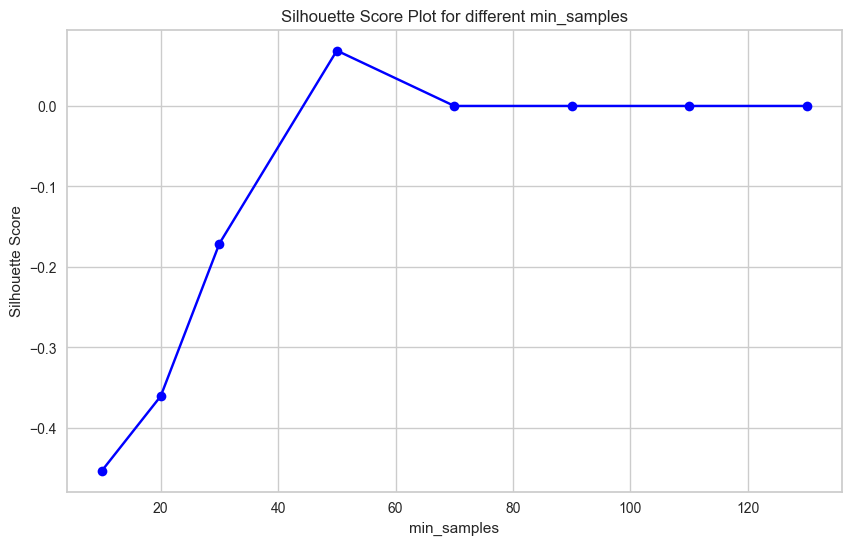

In [26]:
min_samples_values = [10, 20, 30, 50, 70, 90, 110, 130]
DBSCAN_silhouette_score_plot(X, min_samples_values);

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Cluster Interpretation</div>

### 3-dimensional visualization of the clusters

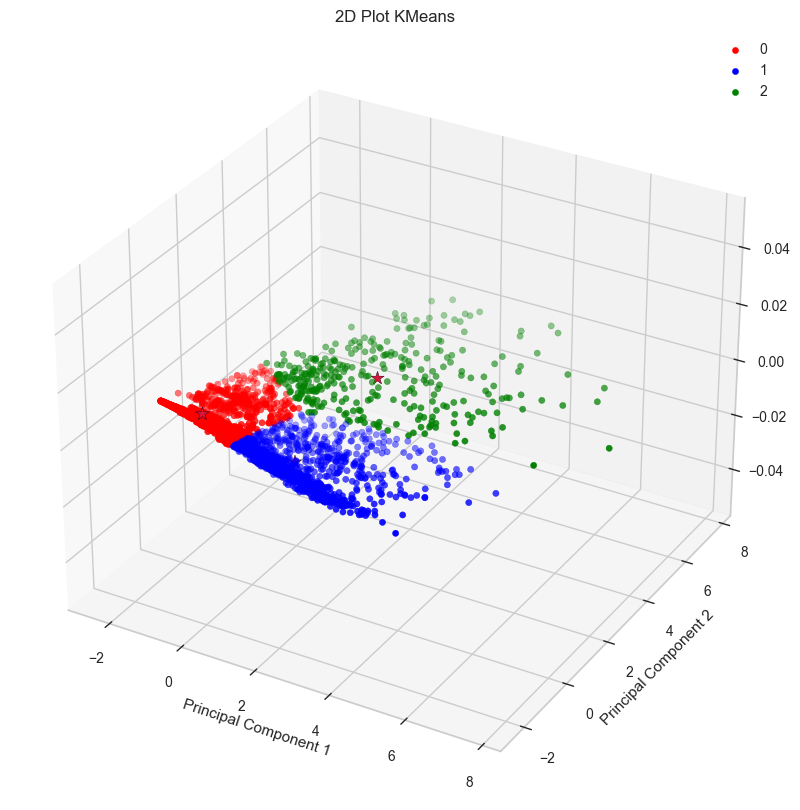

In [27]:
X = pca_data.values
kmeans = KMeans(n_clusters=3, random_state= 29, init='k-means++', n_init=30)
cluster_labels = kmeans.fit_predict(X)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")
colours=["red", "blue", "green", "purple"]

for i in range(0,len(np.unique(cluster_labels))):
    X_sub=X[cluster_labels==i, :]
    ax.scatter(X_sub[:,0], X_sub[:,1], c=colours[i], label=i)
    

ax.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    s=100, marker='*', c='crimson', edgecolor='black', alpha=1
    )

plt.title("2D Plot KMeans")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
    
plt.legend()
plt.show()

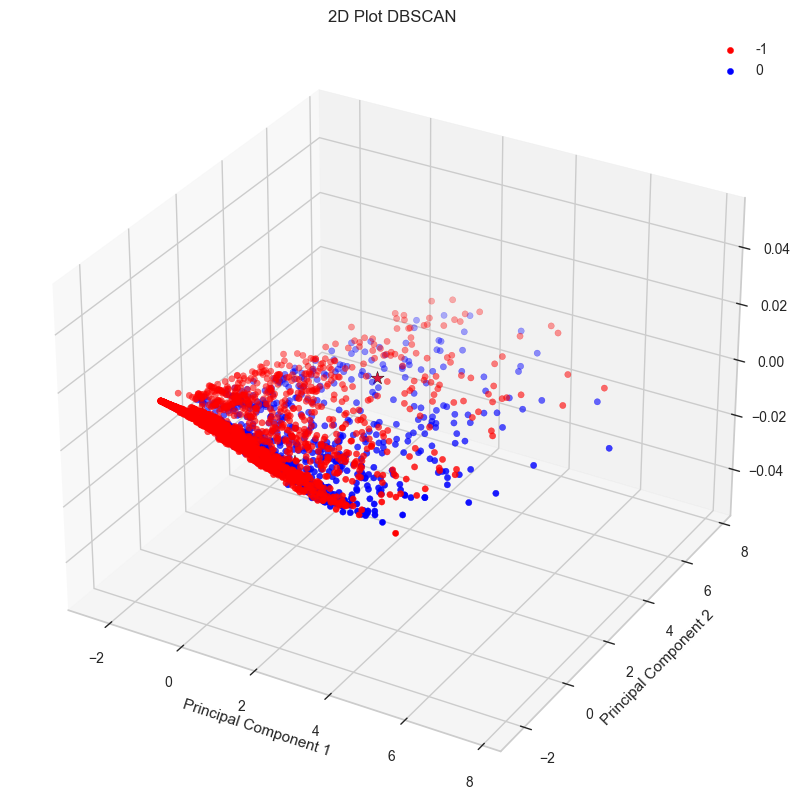

In [28]:
X = pca_data.values
optics = OPTICS(min_samples=50, cluster_method='xi')
optics.fit(X)
labels = optics.labels_

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")
colours = ['red', 'blue', 'green', 'purple']

length = np.arange(len(X))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

# Erstelle einen 3D-Scatterplot
for idx, color in zip(np.unique(labels),colours):
    Xk = X[labels == idx]
    ax.scatter(Xk[:, 0], Xk[:, 1], c=color, label=idx)

ax.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    s=100, marker='*', c='crimson', edgecolor='black', alpha=1
    )

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Plot DBSCAN ')

plt.legend()
plt.show()

K-Means achieves a significantly better performance in identifying clusters.  

A comparison of the average silhouette scores shows that K-Means has a higher coherence and stability with a score of 0.5. In contrast, DBSCAN only achieves 0.05. At the same time, DBSCAN identifies a high number of noise points. 

### Final Clustering

In [29]:
# Legt kmeans als finalisiertes Clustering Algorithmus fest 
final = pca_data
kmeans = KMeans(n_clusters=3)
final_cluster_labels = kmeans.fit_predict(final)

In [30]:
# Fügt die Cluster Labels dem Datensatz hinzu
airline['cluster'] = final_cluster_labels

In [31]:
display(airline.head())
display(airline.shape)

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,174,1,0,0,7000,0,0
1,19244,0,1,215,2,0,0,6968,0,0
2,41354,0,1,4123,4,0,0,7034,0,0
3,14776,0,1,500,1,0,0,6952,0,0
4,97752,0,4,43300,26,2077,4,6935,1,1


(3572, 10)

In [32]:
# gruppiert die Daten nach cluster und berechnet den Durchschnitt
airline[['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans',	
            'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award' ]].groupby(airline['cluster']).mean()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,
0,34636.944821,21.716844,1.141820,3579.727977,6.043562,53.977251,0.200387,3608.050823,0.164569
1,85406.510769,134.270769,1.778462,14296.575385,12.415385,1392.486154,3.843077,4404.612308,0.581538
2,94837.116003,30.376799,3.502964,32152.236240,17.055885,108.509738,0.358171,4758.211685,0.545301


,Balance
cluster,
0,34636.944821
1,85406.510769
2,94837.116003


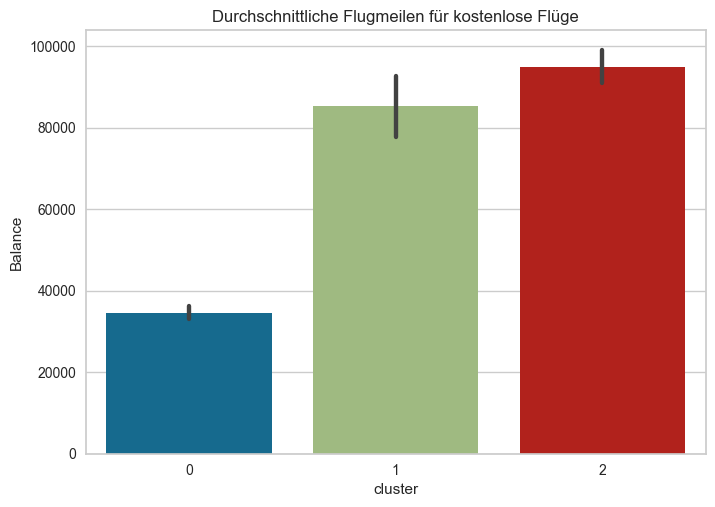

In [33]:
sns.barplot(data=airline, x='cluster', y='Balance')
plt.title('Durchschnittliche Flugmeilen für kostenlose Flüge');

display(airline[['Balance', 'cluster']].groupby(['cluster']).mean())

,Qual_miles
cluster,
0,21.716844
1,134.270769
2,30.376799


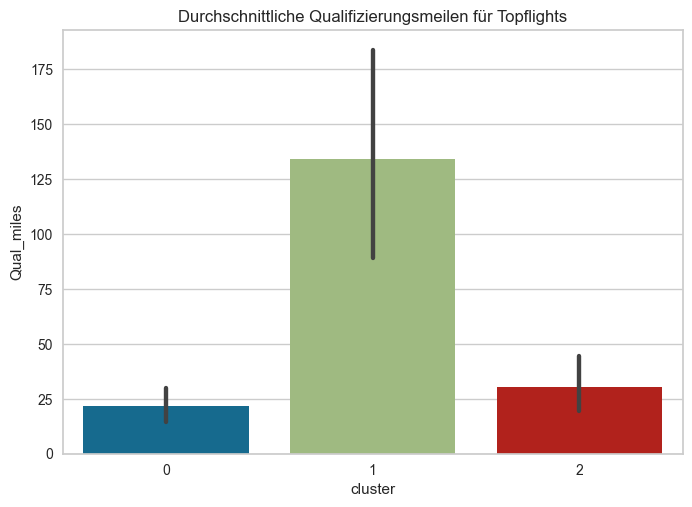

In [34]:
sns.barplot(data=airline, x='cluster', y='Qual_miles')
plt.title('Durchschnittliche Qualifizierungsmeilen für Topflights');

display(airline[['Qual_miles', 'cluster']].groupby(['cluster']).mean())

,cc1_miles
cluster,
0,1.141820
1,1.778462
2,3.502964


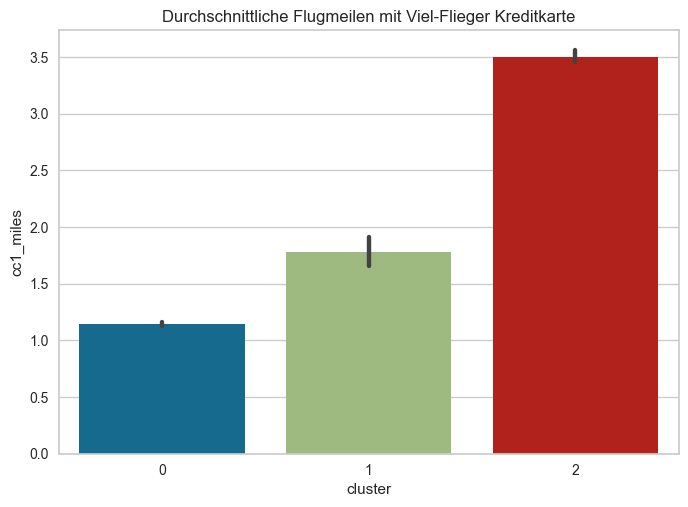

In [35]:
sns.barplot(data=airline, x='cluster', y='cc1_miles')
plt.title('Durchschnittliche Flugmeilen mit Viel-Flieger Kreditkarte');

display(airline[['cc1_miles', 'cluster']].groupby(['cluster']).mean())

,Bonus_miles
cluster,
0,3579.727977
1,14296.575385
2,32152.236240


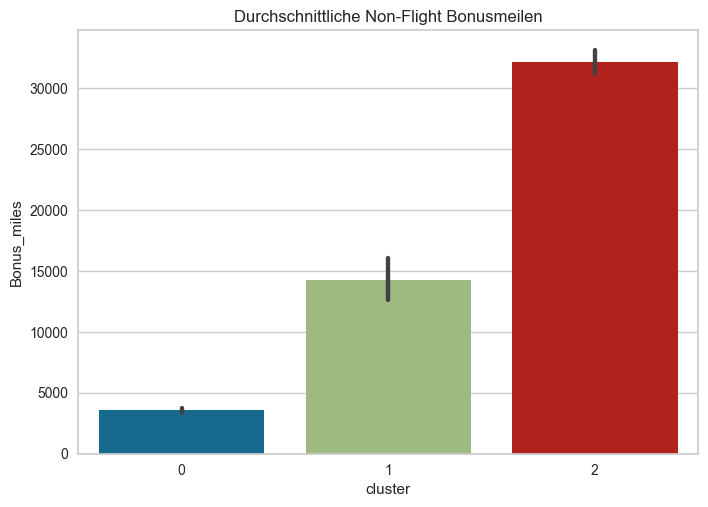

In [36]:
sns.barplot(data=airline, x='cluster', y='Bonus_miles')
plt.title('Durchschnittliche Non-Flight Bonusmeilen');

display(airline[['Bonus_miles', 'cluster']].groupby(['cluster']).mean())

,Bonus_trans
cluster,
0,6.043562
1,12.415385
2,17.055885


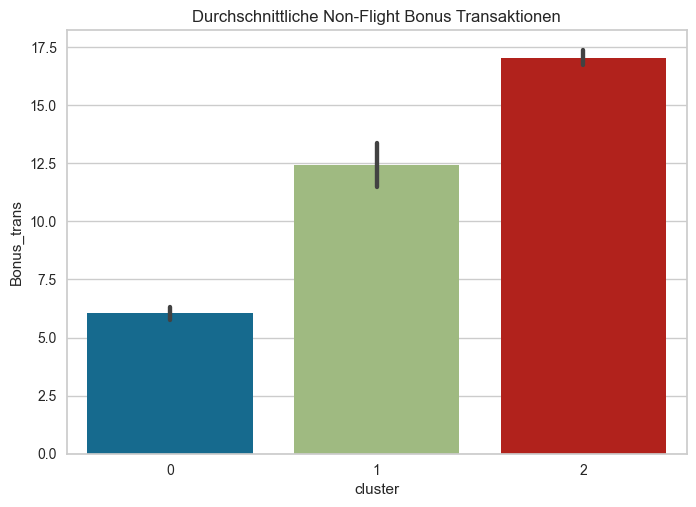

In [37]:
sns.barplot(data=airline, x='cluster', y='Bonus_trans')
plt.title('Durchschnittliche Non-Flight Bonus Transaktionen');

display(airline[['Bonus_trans', 'cluster']].groupby(['cluster']).mean())

,Flight_miles_12mo
cluster,
0,53.977251
1,1392.486154
2,108.509738


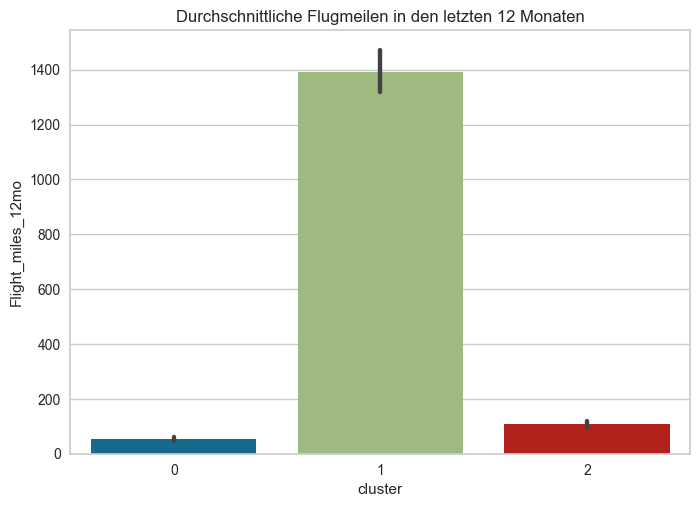

In [38]:
sns.barplot(data=airline, x='cluster', y='Flight_miles_12mo')
plt.title('Durchschnittliche Flugmeilen in den letzten 12 Monaten');

display(airline[['Flight_miles_12mo', 'cluster']].groupby(['cluster']).mean())

,Flight_trans_12
cluster,
0,0.200387
1,3.843077
2,0.358171


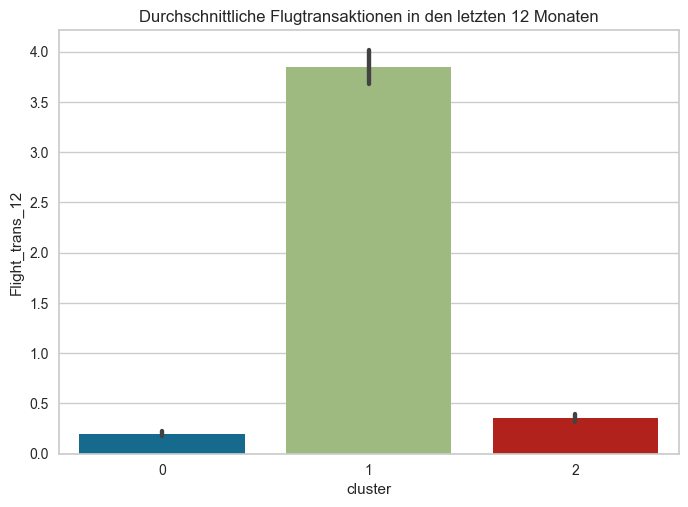

In [39]:
sns.barplot(data=airline, x='cluster', y='Flight_trans_12')
plt.title('Durchschnittliche Flugtransaktionen in den letzten 12 Monaten');

display(airline[['Flight_trans_12', 'cluster']].groupby(['cluster']).mean())

,Days_since_enroll
cluster,
0,3608.050823
1,4404.612308
2,4758.211685


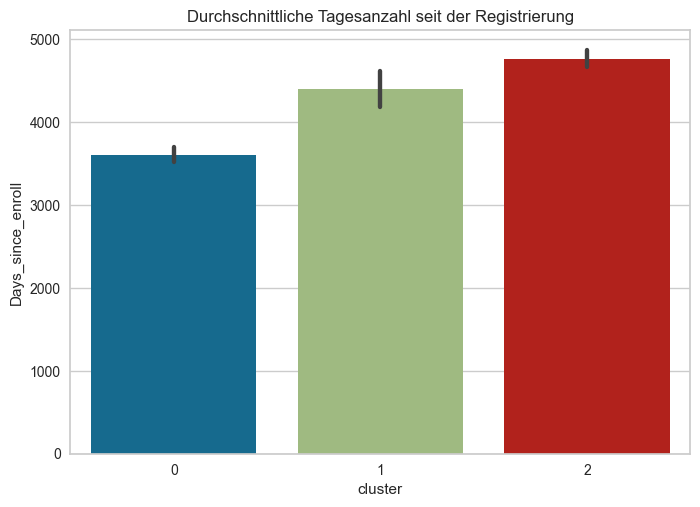

In [40]:
sns.barplot(data=airline, x='cluster', y='Days_since_enroll')
plt.title('Durchschnittliche Tagesanzahl seit der Registrierung');

display(airline[['Days_since_enroll', 'cluster']].groupby(['cluster']).mean())

,Award
cluster,
0,0.164569
1,0.581538
2,0.545301


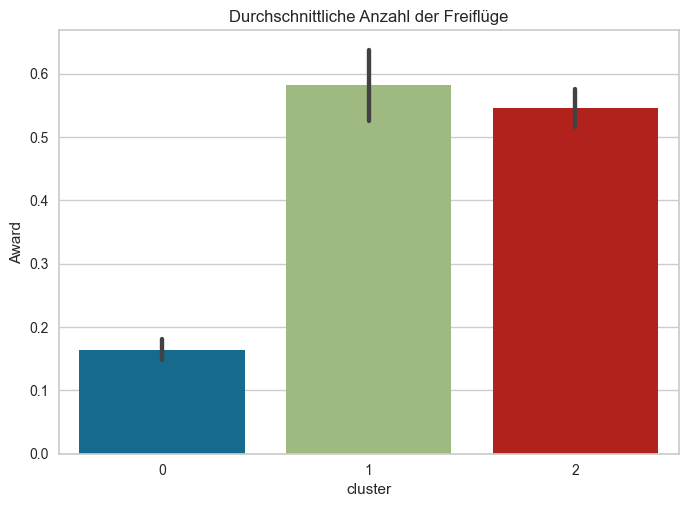

In [42]:
sns.barplot(data=airline, x='cluster', y='Award')
plt.title('Durchschnittliche Anzahl der Freiflüge');

display(airline[['Award', 'cluster']].groupby(['cluster']).mean())

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Conclusion</div>

3 clusters were identified, which indicates that the flight behavior of customers can be divided into 3 segments.  

**Cluster 0:**
- Lowest number of air miles eligible for free flights
- Lowest number of flight miles that qualify for Topflights
- Lowest number of air miles earned with the frequent flyer credit card
- Lowest number of air miles in the last 12 months
- Lowest number of flight transactions in the last 12 months
- Lowest number of days in frequent flyer program
- Rarely received a free flight.  


**Cluster 1:**

- Average number of airline miles that were eligible for free flights
- Highest number of air miles that qualify for Topflights
- Average number of air miles earned with the frequent flyer credit card
- Average number of non-flight bonus transactions
- Significantly highest number of air miles in the last 12 months
- Highest number of flight transactions in the last 12 months
- Relatively long in the frequent flyer program
- Regularly receive a free flight.  


**Cluster 2:**
- Highest number of flight miles that were eligible for free flights
- Average number of air miles that qualify for Topflights
- Significantly highest number of air miles earned with the frequent flyer credit card
- Highest number of non-flight bonus transactions
- Average number of air miles in the last 12 months
- Average number of flight transactions in the last 12 months
- Most days in frequent flyer program
- Average number of free flights received.  